In [2]:
import time
import requests
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.interpolate import make_interp_spline
from datetime import datetime
import pytz
import sounddevice as sd
from IPython.display import clear_output

📡 Mengambil data ke-3...
🌬️ Kecepatan angin: 6.72 m/s
🚨 ALERT: Kecepatan angin melebihi ambang batas!


None

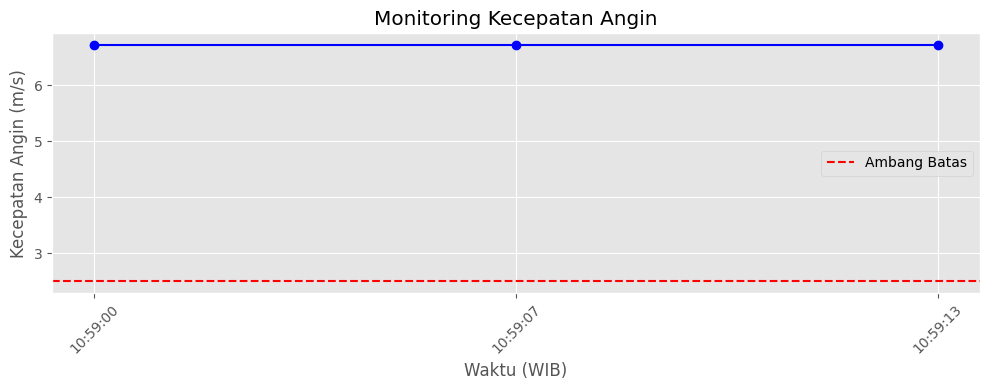

KeyboardInterrupt: 

In [3]:
# Konfigurasi
API_KEY = "1b67ed28df7beecb47878263ea8d09a7"
threshold = 2.5
interval = 5
num_iterations = 10
lat = -7.9885
lon = 110.3783

# Gunakan style grafik
plt.style.use('ggplot')

# Zona waktu Asia/Jakarta
jakarta_tz = pytz.timezone("Asia/Jakarta")

def generate_beep(frequency=880, duration=0.4, fs=44100):
    t = np.linspace(0, duration, int(fs * duration), endpoint=False)
    audio = np.sin(2 * np.pi * frequency * t)
    sd.play(audio, samplerate=fs)
    sd.wait()


def get_wind_speed():
    url = f"http://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API_KEY}&units=metric"
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        wind_speed = data['wind']['speed']
        return wind_speed
    except Exception as e:
        print("❌ Gagal mengambil data:", e)
        return None

timestamps = []
wind_speeds = []

for i in range(num_iterations):
    clear_output(wait=True)
    print(f"📡 Mengambil data ke-{i+1}...")

    wind_speed = get_wind_speed()
    current_time = datetime.now(jakarta_tz).strftime("%H:%M:%S")
    timestamps.append(current_time)

    if wind_speed is not None:
        wind_speeds.append(wind_speed)
        print(f"🌬️ Kecepatan angin: {wind_speed:.2f} m/s")
        if wind_speed > threshold:
            print("🚨 ALERT: Kecepatan angin melebihi ambang batas!")
            display(generate_beep())
        else:
            print("✅ Aman")
    else:
        wind_speeds.append(0)
        print("⚠️ Tidak ada data")

    # Grafik
    plt.figure(figsize=(10, 4))
    plt.plot(timestamps, wind_speeds, marker='o', linestyle='-', color='blue')
    plt.axhline(y=threshold, color='red', linestyle='--', label='Ambang Batas')
    plt.title('Monitoring Kecepatan Angin')
    plt.xlabel('Waktu (WIB)')
    plt.ylabel('Kecepatan Angin (m/s)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    time.sleep(interval)